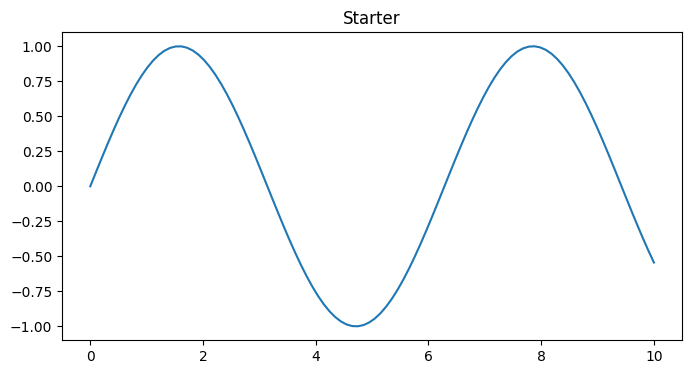

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Nice readable default size for demos
plt.rcParams["figure.figsize"] = (8, 4)

#Quick sanity plot
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.title("Starter")
plt.show()

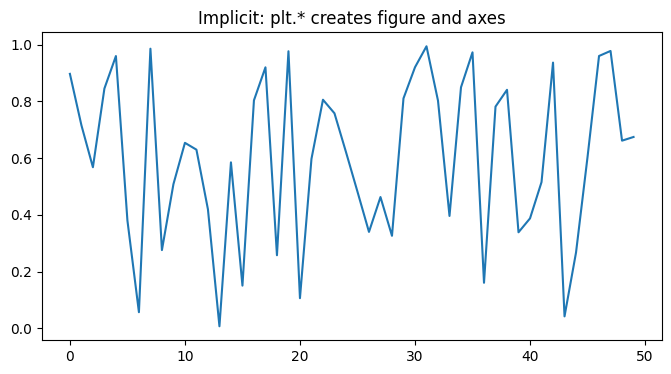

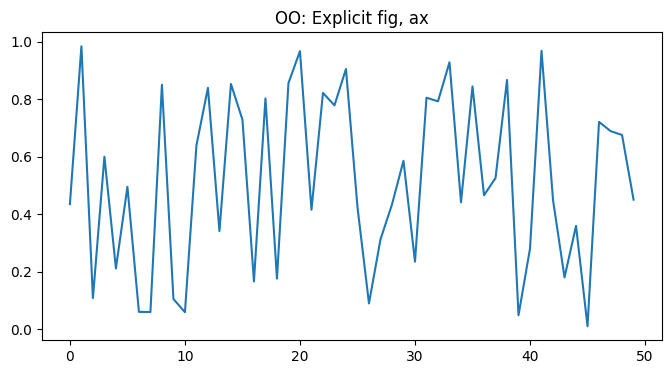

C:\Users\tb975\AppData\Local\Temp\ipykernel_1568\1798996249.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


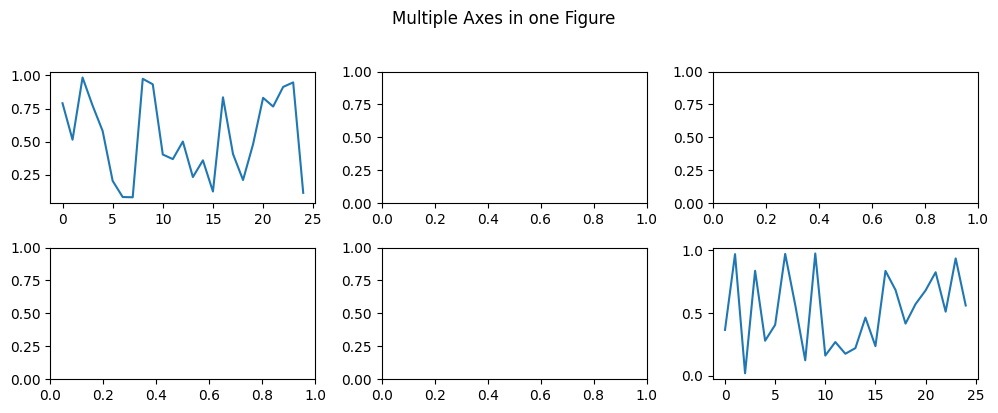

In [7]:
#Stateful - implicit figure/axes
plt.plot(np.random.rand(50))
plt.title('Implicit: plt.* creates figure and axes')
plt.show()

#Object Oriented (OO) explicit figure and axes
fig, ax = plt.subplots()
ax.plot(np.random.rand(50))
ax.set_title('OO: Explicit fig, ax')
plt.show()

#grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4))
axes[0, 0].plot(np.random.rand(25))
axes[1, 2].plot(np.random.rand(25))
fig.suptitle('Multiple Axes in one Figure', y=1.02)
plt.tight_layout()
fig.show()

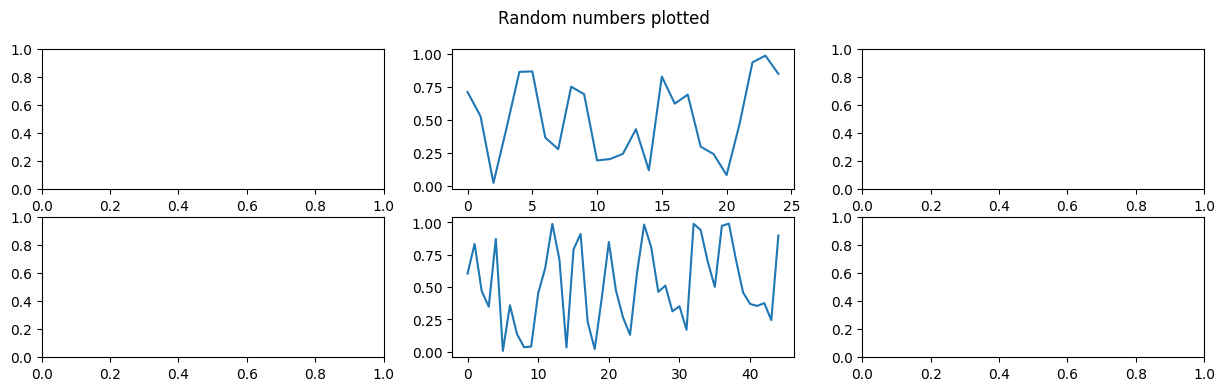

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))
axes[0, 1].plot(np.random.rand(25))
axes[1, 1].plot(np.random.rand(45))
fig.suptitle("Random numbers plotted")
plt.tight_layout
plt.show()

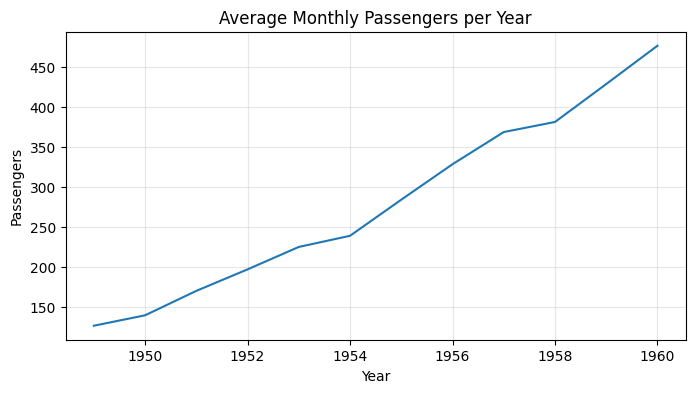

In [3]:
#core plots with seaborn datasets

##line plot

flights = sns.load_dataset("flights") #columns: year, month, passengers

#pivot to make a time-like index (year-month)

df = flights.pivot(index='year', columns='month', values='passengers')

fig, ax = plt.subplots()
ax.plot(df.index, df.mean(axis=1))
ax.set_title('Average Monthly Passengers per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
ax.grid(True, alpha = 0.3)
plt.show()

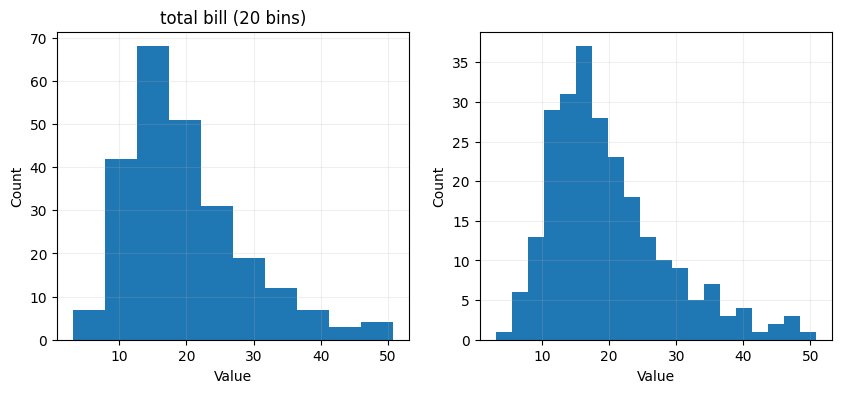

In [10]:
tips = sns.load_dataset('tips').dropna(subset=['total_bill', 'tip'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(tips['total_bill'])
axes[0].set_title('total bill (default bins)')

axes[1].hist(tips['total_bill'], bins =20)
axes[0].set_title('total bill (20 bins)')

for ax in axes:
    ax.set_xlabel('Value'); ax.set_ylabel('Count'); ax.grid(True, alpha = 0.2)
plt.tight_layout
plt.show()

C:\Users\tb975\AppData\Local\Temp\ipykernel_20924\3502335924.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_by_species, labels=species)


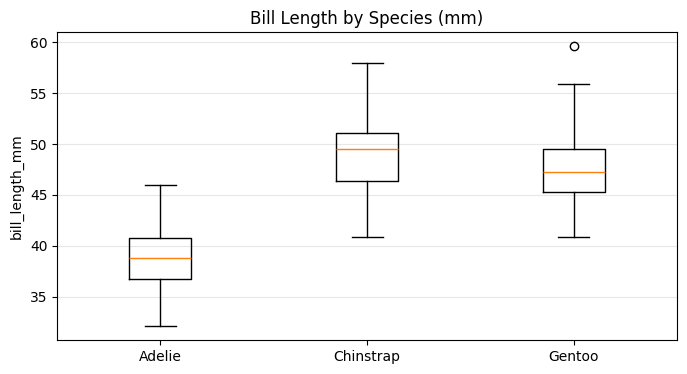

In [12]:
penguins = sns.load_dataset('penguins').dropna(subset=['species', 'bill_length_mm'])

#prepare a list of series for which category (matplotlib boxplot uses lists/arrays)

species = penguins['species'].unique()
data_by_species = [penguins.loc[penguins['species']== s, 'bill_length_mm'] for s in species]

fig, ax = plt.subplots()
ax.boxplot(data_by_species, labels=species)
ax.set_title('Bill Length by Species (mm)')
ax.set_ylabel('bill_length_mm')
ax.grid(axis='y', alpha=0.3)
plt.show()

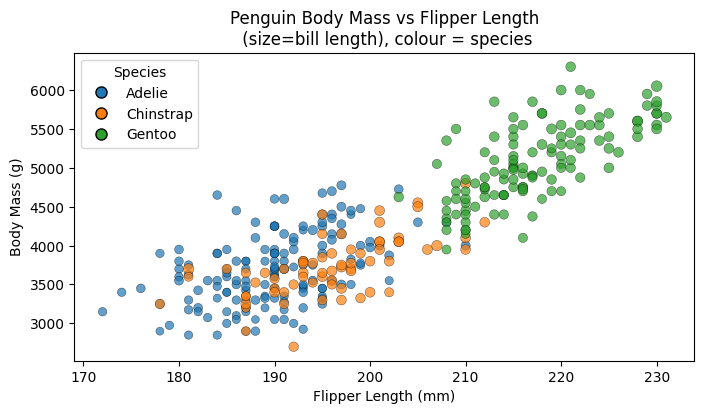

In [15]:
penguins = penguins.dropna(subset=['flipper_length_mm','species', 'bill_length_mm', 'body_mass_g'])

#Map species -> colour manually (matplotlib expects numberic or explicit colour for 'c')
palette = {'Adelie': 'tab:blue', 'Chinstrap': 'tab:orange', 'Gentoo': 'tab:green'}
colours = penguins['species'].map(palette)

fig, ax = plt.subplots()
scatter = ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'], s= penguins['bill_length_mm'], c=colours, alpha=0.7, edgecolor='k', linewidth=0.3)

ax.set_title('Penguin Body Mass vs Flipper Length\n (size=bill length), colour = species')
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')

#manual legend for species
handles = [plt.Line2D([0], [0], marker='o', color='w', label=s, markerfacecolor=palette[s], markeredgecolor='k', markersize=8) for s in palette]

ax.legend(title='Species', handles=handles, frameon=True)
plt.show()